three pairs of classifiers:

naive bayes : decision trees

logistic regression : decision rules

SVM : kNN

In [22]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



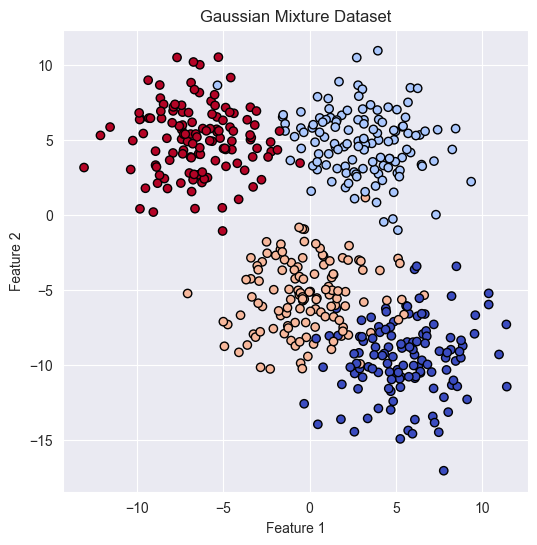

In [28]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=2.5, random_state=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Gaussian Mixture Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [29]:
def show_decision_boundary(X, y, model, title='Decision Boundary'):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
    
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.contourf(xx, yy, z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.show()
    
    
    

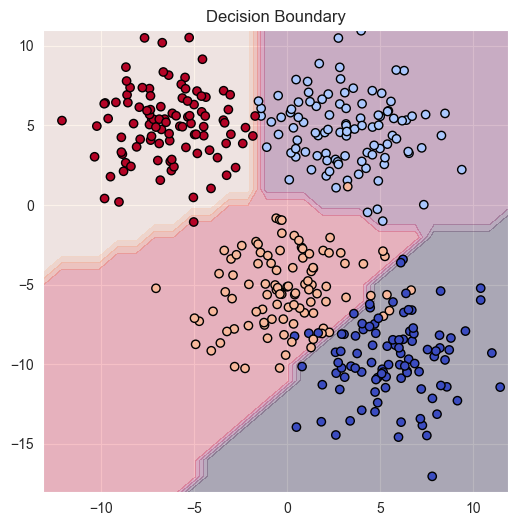

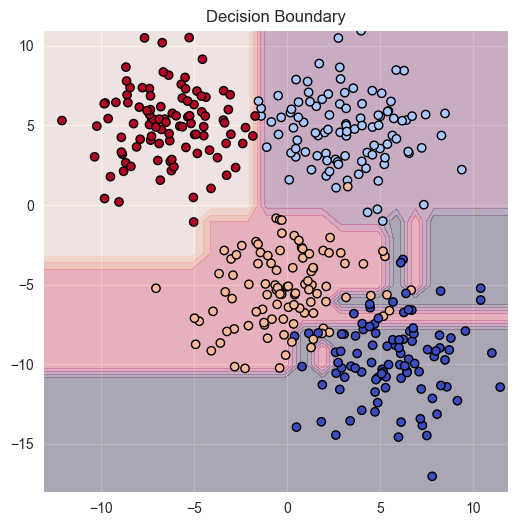

In [30]:
gnb = GaussianNB()
tree = DecisionTreeClassifier()

y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred_tree = tree.fit(X_train, y_train).predict(X_test)


show_decision_boundary(X_train, y_train, gnb)
show_decision_boundary(X_train, y_train, tree)


In [31]:
confusion_matrix(y_test, y_pred)


array([[25,  0,  2,  0],
       [ 0, 22,  0,  1],
       [ 2,  0, 22,  0],
       [ 0,  1,  0, 25]], dtype=int64)

In [32]:

confusion_matrix(y_test, y_pred_tree)

array([[23,  0,  4,  0],
       [ 0, 22,  0,  1],
       [ 2,  0, 22,  0],
       [ 0,  1,  0, 25]], dtype=int64)